In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
df = pd.read_csv('sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


<AxesSubplot:xlabel='space', ylabel='rent'>

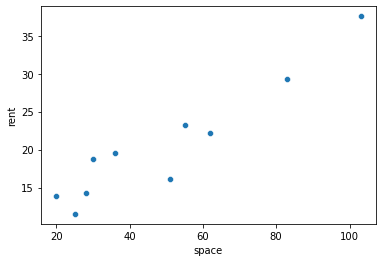

In [4]:
sns.scatterplot(x='space', y='rent',data=df)

In [5]:
x = df['space'].values
x

y = df['rent'].values
y

theta_0 = 2
theta_1 = 3
np.mean(np.square(y -(theta_0 + theta_1 * x)))

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103], dtype=int64)

In [16]:
def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y -(theta_0 + theta_1 * x)))

In [17]:
cost_func(0,0,x=x,y=y)

482.8338493321156

In [22]:
X = np.array([[1,2,3,4],
            [1,2,3,4],
            [1,2,3,4],
            [1,2,3,4]])
Y = np.array([[10,10,10,10],
            [20,20,20,20],
            [30,30,30,30],
            [40,40,40,40]])
Z = np.array([[10,20,30,40],
            [20,40,60,80],
            [30,60,90,120],
            [40,80,120,160]])

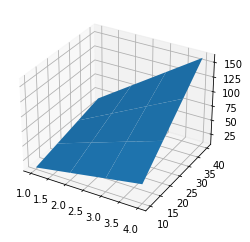

In [23]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

＃正規方程式

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('sample_data.csv')

In [5]:
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


In [6]:
y = df['rent'].values.T
y

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

In [7]:
x = df['space'].values.T
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103], dtype=int64)

In [8]:
X = np.vstack([np.ones(len(x)), x]).T

In [9]:
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)

### scikit-learnで線形回帰

In [10]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
x = df['space'].values
y = df['rent'].values
X = x.reshape(10,1)
model.fit(X,y)

LinearRegression()

In [21]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [23]:
model.coef_

array([0.27487161])

In [24]:
model.intercept_

7.0962324999088295

特徴量スケーリング(feature scaling)

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('sample_data2.csv')
df.head()

,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18
3,30,18.722680,10
4,36,19.602674,6


In [30]:
X =df[['space','age']]
X

,space,age
0,20,3
1,25,13
2,28,18
3,30,10
4,36,6
5,51,1
6,55,5
7,62,2
8,83,5
9,103,23


In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X)

StandardScaler()

In [37]:
X_scaled = scaler.transform(X)


In [38]:
pd.DataFrame(X_scaled)

,0,1
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [41]:
y = df['rent']
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

### 正規化(normalization)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
norm = MinMaxScaler()
norm.fit(X)

MinMaxScaler()

In [45]:
X_scaled = norm.transform(X)

In [46]:
pd.DataFrame(X_scaled)

,0,1
0,0.000000,0.090909
1,0.060241,0.545455
2,0.096386,0.772727
3,0.120482,0.409091
4,0.192771,0.227273
5,0.373494,0.000000
6,0.421687,0.181818
7,0.506024,0.045455
8,0.759036,0.181818
9,1.000000,1.000000


In [47]:
norm.fit_transform(X)

array([[0.        , 0.09090909],
       [0.06024096, 0.54545455],
       [0.09638554, 0.77272727],
       [0.12048193, 0.40909091],
       [0.19277108, 0.22727273],
       [0.37349398, 0.        ],
       [0.42168675, 0.18181818],
       [0.5060241 , 0.04545455],
       [0.75903614, 0.18181818],
       [1.        , 1.        ]])

### 線形回帰の解釈

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels import api

Duplicate key in file WindowsPath('C:/anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  IPAexGothic')


In [2]:
df = pd.read_csv('sample_data2.csv')

In [6]:
y_col = 'rent'
X = df.drop(columns=[y_col])
X
y = df[y_col]

In [10]:
#線形回帰
import statsmodels.api as sma
#バイアス項の追加
X = sma.add_constant(X)
est = sma.OLS(y,X)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           0.000282
Time:                        18:36:24   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
import seaborn as sns

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


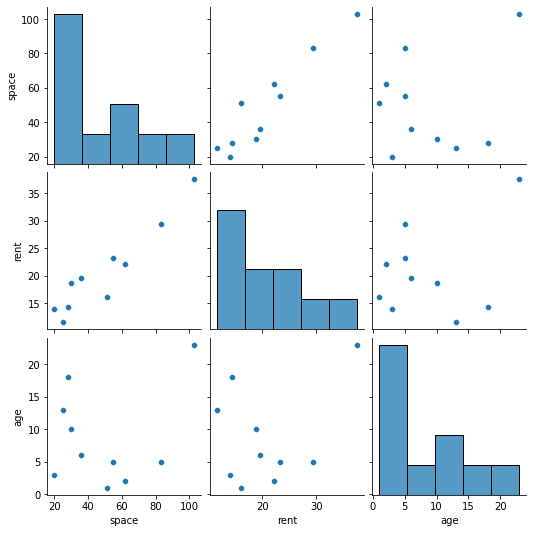

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop(columns=[y_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)
X_scaled

array([[ 1.        , -1.13466215, -0.8062772 ],
       [ 1.        , -0.9410338 ,  0.63350351],
       [ 1.        , -0.82485679,  1.35339387],
       [ 1.        , -0.74740544,  0.2015693 ],
       [ 1.        , -0.51505142, -0.37434298],
       [ 1.        ,  0.06583364, -1.09423334],
       [ 1.        ,  0.22073632, -0.51832106],
       [ 1.        ,  0.49181602, -0.95025527],
       [ 1.        ,  1.3050551 , -0.51832106],
       [ 1.        ,  2.07956852,  2.07328422]])

In [18]:
est = sma.OLS(y,X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           0.000282
Time:                        18:47:26   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('sample_data3.csv')
df

,space,rent,age,facing_direction
0,20,13.958824,3,South
1,25,11.533805,13,South
2,28,14.269547,18,North
3,30,18.722680,10,West
4,36,19.602674,6,West
5,51,16.068166,1,South
6,55,23.183599,5,East
7,62,22.212595,2,North
8,83,29.357010,5,North
9,103,37.565129,23,West


In [5]:
pd.get_dummies(df,drop_first=True)

,space,rent,age,facing_direction_North,facing_direction_South,facing_direction_West
0,20,13.958824,3,0,1,0
1,25,11.533805,13,0,1,0
2,28,14.269547,18,1,0,0
3,30,18.722680,10,0,0,1
4,36,19.602674,6,0,0,1
5,51,16.068166,1,0,1,0
6,55,23.183599,5,0,0,0
7,62,22.212595,2,1,0,0
8,83,29.357010,5,1,0,0
9,103,37.565129,23,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### hold-out

In [10]:
import seaborn as sns
df = sns.load_dataset('tips')

Duplicate key in file WindowsPath('C:/anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  IPAexGothic')


In [11]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
y_col = 'tip'
X = df.drop(columns=[y_col])
X
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
X = pd.get_dummies(X,drop_first=True)
y = df[y_col]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [23]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

170
74
170
74


In [30]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
scaler.fit(X_train[numeric_cols])
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [32]:
X_test_scaled.mean()

total_bill    -0.088666
size          -0.003263
sex_Female     0.445946
smoker_No      0.527027
day_Fri        0.135135
day_Sat        0.351351
day_Sun        0.324324
time_Dinner    0.756757
dtype: float64

In [33]:
#線形回帰の学習
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [36]:
y_pred

array([2.82249035, 2.97504474, 2.8260184 , 1.38113692, 3.15154584,
       1.72121268, 2.48332645, 3.03579004, 2.75176346, 4.52560955,
       3.1133346 , 3.14781575, 2.33198109, 2.11518372, 2.93262778,
       4.27846609, 1.83157994, 2.26626275, 2.31085596, 3.24382161,
       3.81889336, 2.85616455, 2.42949782, 2.42039736, 2.20253234,
       2.42509643, 2.81777778, 4.70274951, 3.81268552, 2.38673795,
       2.29194112, 2.20803273, 2.45503466, 1.7743294 , 2.71663745,
       2.22913684, 2.72146912, 2.01205852, 5.85346207, 3.49435578,
       2.26246168, 2.20347519, 2.50905642, 4.41646769, 1.97212663,
       2.78445294, 2.65274212, 3.01652357, 2.73423023, 3.95761528,
       3.9498931 , 2.53992971, 2.71758399, 6.35620823, 1.7434279 ,
       2.33450139, 4.23562521, 3.29319236, 2.41114285, 2.20345847,
       3.72455103, 2.29099827, 3.04008335, 3.74539008, 4.01431996,
       2.26547605, 2.66047323, 3.84238482, 2.17921165, 3.87859588,
       2.59899485, 1.94814647, 3.70801825, 2.11341037])

In [37]:
y_test

64     2.64
63     3.76
55     3.51
111    1.00
225    2.50
       ... 
90     3.00
101    3.00
75     1.25
4      3.61
109    4.00
Name: tip, Length: 74, dtype: float64

In [39]:
#精度
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_test,y_pred)
# np.mean(np.square(y_test - y_pred))

0.955080898861715

## LOOCV

In [43]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
X = df['total_bill'].values.reshape(-1,1)
y = df['tip']

In [48]:
from sklearn.model_selection import LeaveOneOut

In [50]:
loo = LeaveOneOut()
list(loo.split(X))

[(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 172, 173, 174, 175,

In [53]:
model = LinearRegression()
mse_list = []
for train_index,test_index in loo.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
    #モデルの学習
    model.fit(X_train,y_train)
    #テストデータの予測
    y_pred = model.predict(X_test)
    #MSE
    mse = mean_squared_error(y_test,y_pred)
    mse_list.append(mse)
    

In [56]:
print(np.mean(mse_list))

1.0675673489857436


In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cv = LeaveOneOut()
scores = cross_val_score(model,X,y,cv=cv,scoring='neg_mean_squared_error')
print(f'MSE(LOOCV): {-np.mean(scores)}')
print(f'std: {np.std(scores)}')

MSE(LOOCV): 1.0675673489857436
std: 2.099794455177631


## 回帰の評価指標

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
df = sns.load_dataset('tips')

In [5]:
X = df['total_bill'].values.reshape(-1,1)
y = df['tip'].values

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# pred
y_pred = model.predict(X_test)

In [6]:
y_pred

array([2.71486884, 2.78639251, 2.90900452, 1.65836207, 2.57999564,
       1.50509707, 2.74858715, 3.30136293, 2.77208778, 4.45800284,
       3.50060744, 3.49345507, 2.35520697, 2.24587793, 2.28879213,
       4.02375199, 1.77075641, 2.3480546 , 2.83645908, 3.2778623 ,
       3.98901192, 3.05511716, 2.55240794, 2.45431834, 2.29798803,
       2.59327861, 2.16004953, 3.96244599, 3.50162921, 2.5289073 ,
       2.42264357, 2.19274606, 2.49314547, 1.99963215, 2.78639251,
       2.28572683, 2.64743224, 1.97306622, 5.85577969, 2.55036441,
       1.79425705, 2.18763723, 2.52073317, 3.96755482, 2.22135553,
       2.65151931, 2.78128368, 3.12255376, 2.66173698, 3.66409011,
       4.2567148 , 2.74552185, 3.01118119, 5.83943142, 1.89847725,
       2.14676656, 3.97572896, 3.03161652, 2.37462053, 2.21113786,
       3.70496078, 2.53299437, 3.07963956, 3.47199797, 3.99718606,
       2.5043849 , 2.60043097, 4.2720413 , 1.97306622, 3.87763935,
       2.4890584 , 1.99145802, 3.43010554, 2.37972937])

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mse = mean_squared_error(y_test, y_pred, squared=False)

In [11]:
mse

0.933372676777071

In [12]:
from sklearn.metrics import mean_absolute_error

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.6903119067790223

## R-Squared(R**2)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test, y_pred)

0.49515102188632776

In [19]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Duplicate key in file WindowsPath('c:/anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  IPAexGothic')


In [7]:
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

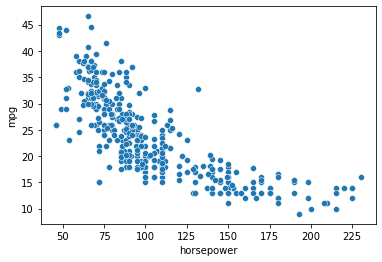

In [9]:

X = df['horsepower'].values.reshape(-1,1)
y = df['mpg']
sns.scatterplot(x=df['horsepower'],y=df['mpg'])

In [10]:
#多項式特徴量
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(2,include_bias=False)
X_poly = poly.fit_transform(X)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_poly,y)

LinearRegression()

In [16]:
X_axis = np.arange(50,230).reshape(-1,1)
x_axis_ = poly.fit_transform(X_axis)
pred = model.predict(X_axis_)
sns.scaterplot(X_axis,pred,)

NameError: name 'X_axis_' is not defined

## 線形回帰VS非線形

In [30]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
from sklearn.pipeline import Pipeline

In [28]:
X = df['horsepower'].values.reshape(-1,1)
y = df['mpg']
model = LinearRegression()
n_repeats = 3
k = 5
cv = RepeatedKFold(n_splits=k,n_repeats=n_repeats,random_state=0)
degrees = [1,2,3]
results = {}
for d in degrees:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X)
    scores = cross_val_score(model,X_poly,y,scoring='neg_mean_squared_error',cv=cv)
    results[f'degree{d}'] = {'scores_mean':-np.mean(scores), 'scores_std':np.std(scores)}

In [27]:
scores

array([-15.91065108, -22.1624462 , -21.16531541, -24.32069337,
       -12.95586189, -18.54514929, -17.03665635, -31.06863501,
       -14.68685054, -16.08622087, -17.7286585 , -20.30767593,
       -17.0969599 , -17.68090829, -24.75449275])

In [29]:
pd.DataFrame(results)

,degree1,degree2,degree3
scores_mean,24.235392,19.294970,19.433812
scores_std,3.346678,4.413627,4.508224


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

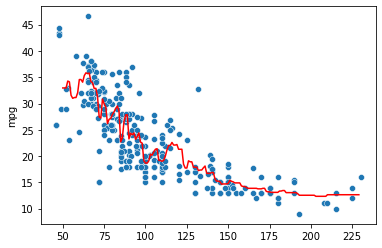

In [38]:
X_axis = np.arange(50,230).reshape(-1,1)
y_pred = model.predict(X_axis)
sns.scatterplot(x=X_train[:,0],y=y_train)
plt.plot(X_axis,y_pred,'r')

## KNN回帰比較

In [40]:
k_list = np.arange(1,31)
k = 5
cv = RepeatedKFold(n_splits=k,n_repeats=n_repeats,random_state=0)
score_list = []
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=cv)
    score_list.append(-np.mean(scores))

Text(0, 0.5, '5fold cv error(MSE)')

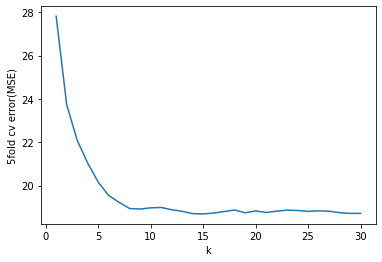

In [41]:
plt.plot(k_list,score_list)
plt.xlabel('k')
plt.ylabel('5fold cv error(MSE)')

In [ ]:
print(f'Best performance: k={np.argmin(score_list)},cv error =(np.min(score_list)')

## Ridge

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')
display(df.head())
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [26]:
y_col = 'Salary'
X = df.loc[:,df.columns!=y_col]
y = df[y_col]
#標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
#ダミー変数作成は数値カラムのリストの作成の後
X = pd.get_dummies(X,drop_first=True)
#hold-out
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
#標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
#モデルの学習
model = Ridge()
model.fit(X_train,y_train)
#予測
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)


In [30]:
mae = mean_absolute_error(y_test,y_pred)
mae

251.01058042384872

In [31]:
model.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [32]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.coef_


array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

## Ridge(λの変化による精度の変化)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')
display(df.head())
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [38]:
df.dropna(inplace=True)

In [39]:
y_col = 'Salary'
X = df.loc[:,df.columns!='Salary']
y = df[y_col]
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
X = pd.get_dummies(X,drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])
model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

In [42]:
mse

123410.17846037971

In [46]:
alphas = np.logspace(-3,3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

In [48]:
mse_list

[125455.84806306234,
 125450.79051193755,
 125444.11123695172,
 125435.30112063437,
 125423.69932080881,
 125408.45406070203,
 125388.47777801045,
 125362.39944617162,
 125328.52042255327,
 125284.78585732632,
 125228.79195896635,
 125157.85989319583,
 125069.21742152142,
 124960.33349864383,
 124829.43796004674,
 124676.21410899218,
 124502.5683839062,
 124313.27377738136,
 124116.20712057783,
 123921.93728106198,
 123742.6224676874,
 123590.4841817213,
 123476.37827487789,
 123409.01775103426,
 123395.17763936057,
 123440.81293394207,
 123552.5806852321,
 123738.95792971947,
 124010.23153147862,
 124377.2439053682,
 124849.64967197092,
 125434.90693029821,
 126138.76607529906,
 126966.88662131489,
 127926.38687784153,
 129026.39513397627,
 130277.78003385736,
 131693.1653967668,
 133288.31823125537,
 135085.1796610295,
 137115.91840551555,
 139427.06223905832,
 142083.0925023317,
 145169.2731713062,
 148792.98864368515,
 153081.12231398234,
 158169.0618478135,
 164176.97315876323,
 1

Text(0, 0.5, 'test MSE')

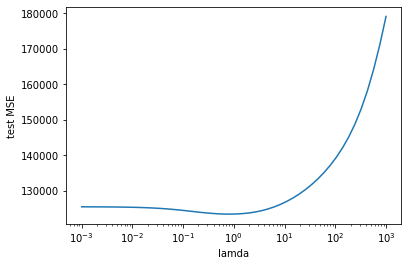

In [50]:
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized coefficients')

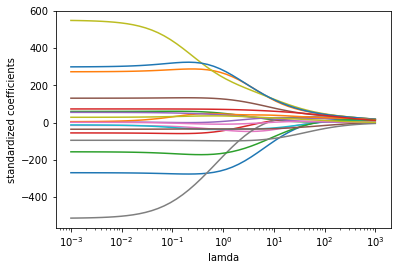

In [52]:
plt.plot(alphas,coefs)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('standardized coefficients')

## Lasso

In [53]:
from sklearn.linear_model import Lasso

In [55]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
275,0.374183,0.079339,0.759350,-0.036632,0.127298,-0.296460,-1.139596,-0.906175,-0.919988,-0.550834,-0.911932,-0.815974,-0.833650,-0.629885,0.644269,0.260164,0,1,0
134,-1.795062,-1.530461,-0.745509,-1.472432,-0.853766,-1.260217,0.390956,-0.925691,-0.935379,-0.663465,-0.898341,-0.740174,-0.783531,-0.535854,-0.769140,-1.203755,1,1,1
19,-1.904206,-1.684826,-0.398234,-1.552199,-1.180788,-1.308404,0.172306,-0.883803,-0.885785,-0.550834,-0.942512,-0.791856,-0.804414,-0.312965,-0.722249,-1.057363,1,1,1
140,1.322375,0.785006,2.495725,1.199751,2.702594,1.149175,-1.139596,-0.898559,-0.897756,-0.353731,-0.826988,-0.626474,-0.750119,0.094505,-0.842825,0.699339,0,1,0
99,0.121786,0.035235,0.412075,0.601501,-0.158845,-0.248272,-0.046344,-0.215961,-0.263296,-0.353731,-0.031910,-0.474874,0.039246,0.000473,-0.829427,-0.910971,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1.322375,0.674745,-1.324301,1.558701,-0.894644,0.908236,-1.139596,-0.641514,-0.665178,-0.874647,-0.487211,-0.836647,-0.578881,0.028334,-0.789236,-0.032620,1,0,1
240,-0.921907,-0.692483,-0.745509,-0.794415,-0.894644,-0.392836,1.046907,1.118294,1.128755,-0.212942,0.970433,0.424390,0.644843,-0.800534,-0.266743,-0.910971,0,1,0
151,-1.740490,-1.486357,-0.861267,-1.153365,-1.221666,-1.067465,-1.139596,-1.092771,-1.077320,-0.762017,-1.017263,-0.940010,-0.892121,-0.918944,-0.494496,-1.057363,0,1,0
62,-1.160660,-1.155576,-1.324301,-1.113482,-1.466932,-1.452968,-0.702295,-0.699111,-0.731873,-0.874647,-0.776021,-0.853874,-0.800237,-0.581128,0.463406,0.552947,0,1,0


In [57]:
X_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
166,1.306537,1.140469,0.442238,1.348904,0.874308,-0.634234,-0.676949,-0.305581,-0.308684,-0.309188,-0.226151,-0.384099,-0.631799,0.007581,2.665199,3.111521,1,0,1
249,0.143306,-0.124051,0.665476,0.403187,0.178034,2.151693,2.378992,2.528439,2.249312,4.562225,2.772762,3.341926,3.391917,-1.105775,-0.714304,-1.240642,0,1,0
294,0.826366,0.304983,0.553857,-0.050757,-0.309357,-0.845289,-0.676949,-0.718152,-0.716613,-0.603829,-0.736391,-0.763722,-0.757238,-0.837034,0.391715,0.674310,0,1,0
9,0.021573,-0.327277,0.553857,-0.202072,0.456544,1.011996,1.042018,0.897028,0.718931,1.664913,0.959408,1.342405,1.860911,-1.105775,-0.714304,-1.240642,0,0,0
190,0.224462,0.463048,-0.450715,0.857131,-0.274543,0.716519,-1.058941,-0.816293,-0.768578,-0.731508,-0.708878,-0.805325,-0.641448,-0.019293,-0.652859,-0.718382,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.972584,-0.869215,-1.120430,-0.996475,-0.936003,-0.803078,-0.294956,-0.690974,-0.704921,-0.613651,-0.731389,-0.667516,-0.544956,0.272483,-0.483883,-0.544296,0,0,0
119,-0.478887,-0.485343,-1.008811,-0.920817,-0.309357,-0.887500,0.087036,-0.260285,-0.273608,-0.662758,-0.461262,-0.430902,-0.625366,-0.756412,0.706623,0.848396,0,0,0
139,0.271803,-0.078890,-1.120430,0.403187,-0.727121,1.265262,-1.058941,-0.901978,-0.877705,-0.800257,-0.833937,-0.888530,-0.696127,-0.046167,-0.660539,0.326137,0,1,1
291,-0.898191,-0.869215,-0.450715,-1.072132,-0.796748,-0.507601,-0.103960,-0.563391,-0.571110,-0.505615,-0.663857,-0.547909,-0.512792,-0.752572,-0.675901,-0.718382,1,1,0


In [59]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

123256.43644764423
250.74176175007463


In [60]:
lasso.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

In [62]:
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')

In [68]:
df.dropna(inplace=True)

In [69]:
y_col = 'Salary'
X = df.loc[:,df.columns!='Salary']
y = df[y_col]
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
X = pd.get_dummies(X,drop_first=True)
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])
model = Lasso(alpha)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

In [73]:
alphas = np.logspace(-3,3)
mse_list = []
coefs = [] 
for alpha in alphas:
    model = Lasso(alpha)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)


c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.991e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coo

In [74]:
mse_list

[125494.27338211835,
 125493.84574858667,
 125493.28678082649,
 125492.54801268606,
 125491.58544770654,
 125490.3296760304,
 125488.68854303005,
 125486.57620682138,
 125483.87276562341,
 125480.42368933726,
 125476.05813838693,
 125470.57099803876,
 125464.8297540804,
 125454.18604230268,
 125432.8264114156,
 125388.0901511946,
 125329.05363223827,
 125249.26383160196,
 125140.98360816465,
 125000.22662058644,
 124818.47253933636,
 124585.9371307744,
 124292.38334666395,
 123928.85892250238,
 123491.84819507875,
 123019.9933265657,
 122485.14996024813,
 122389.99066396726,
 123007.17674629983,
 123836.89828269926,
 125412.90882878791,
 127898.76351042914,
 132012.3920294348,
 133877.9239106297,
 136477.61246175077,
 140346.89774053995,
 145944.51517026496,
 150009.10414059443,
 155987.72149313785,
 164951.0565232263,
 177979.55311476337,
 192580.23566079562,
 214253.68666537167,
 245477.06711474812,
 266576.2011031627,
 266576.2011031627,
 266576.2011031627,
 266576.2011031627,
 2665

In [75]:
coefs

[array([-268.86332582,  272.48505887,   59.86012929,  -55.20385725,
           3.7604743 ,  130.99556885,  -14.69361461, -515.7281763 ,
         552.61745129,  -11.82644678,  298.28491684,    3.75279322,
        -156.49559651,   73.32299821,   54.98619757,  -35.65852744,
           1.68373234,  -95.00265086,   28.38144171]),
 array([-268.86497948,  272.48415347,   59.85171614,  -55.19596213,
           3.76522487,  130.99386877,  -14.70044211, -515.6219203 ,
         552.55339071,  -11.81241969,  298.26186289,    3.72825122,
        -156.49648781,   73.32249216,   54.98080465,  -35.65646017,
           1.67854113,  -95.00212315,   28.38441786]),
 array([-268.86709585,  272.48282174,   59.84053166,  -55.18544943,
           3.77156686,  130.99158985,  -14.70946096, -515.48163087,
         552.46928655,  -11.7936804 ,  298.23108241,    3.69545362,
        -156.49758097,   73.32182234,   54.97367183,  -35.65372629,
           1.67169265,  -95.0014176 ,   28.38833328]),
 array([-268.869884

Text(0, 0.5, 'test MSE')

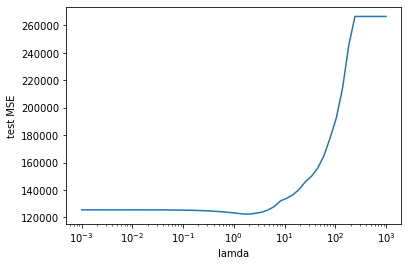

In [78]:
plt.plot(alphas,mse_list)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized cofficients')

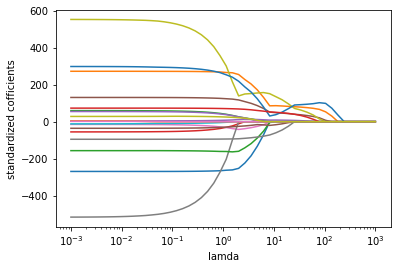

In [80]:
plt.plot(alphas,coefs)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('standardized cofficients')

In [82]:
alphas[np.argmin(mse_list)]

2.023589647725158

In [83]:
np.min(mse_list)

122389.99066396726

In [84]:
lasso = Lasso(alphas[np.argmin(mse_list)])
lasso.fit(X_train, y_train)

Lasso(alpha=2.023589647725158)

In [85]:
lasso.coef_

array([-252.19222786,  254.95517425,   26.34476738,  -11.1644903 ,
         11.55462205,  117.61960902,  -41.9368323 ,   -0.        ,
        139.31490657,   -0.        ,  218.61993867,    0.        ,
       -159.99440584,   68.72670632,   26.06178039,  -25.04508935,
          0.        ,  -92.29918255,   21.63684134])

In [86]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [88]:
pd.DataFrame({'coef': lasso.coef_, 'column_name':X_train.columns.to_list()})

,coef,column_name
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
